In [1]:
%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

plt.style.use('fivethirtyeight')
sns.set_context("notebook")

Let's start by loading the California baby names again.

In [2]:
import urllib.request
import os.path
import zipfile

data_url = "https://www.ssa.gov/oact/babynames/state/namesbystate.zip"
local_filename = "babynamesbystate.zip"
if not os.path.exists(local_filename): # if the data exists don't download again
    with urllib.request.urlopen(data_url) as resp, open(local_filename, 'wb') as f:
        f.write(resp.read())

zf = zipfile.ZipFile(local_filename, 'r')

ca_name = 'CA.TXT'
field_names = ['State', 'Sex', 'Year', 'Name', 'Count']
with zf.open(ca_name) as fh:
    babynames = pd.read_csv(fh, header=None, names=field_names)

babynames.sample(5)

,State,Sex,Year,Name,Count
231987,CA,F,2020,Niyati,5
8869,CA,F,1927,Jenny,10
2299,CA,F,1916,Phoebe,7
231378,CA,F,2020,Delayza,6
290289,CA,M,1980,Darren,228


Goal 1: Find the most popular baby name in California in 2018

In [3]:
babynames[babynames["Year"] == 2018].sort_values(by = "Count", ascending = False).head(5)

,State,Sex,Year,Name,Count
221160,CA,F,2018,Emma,2743
385701,CA,M,2018,Noah,2569
221161,CA,F,2018,Mia,2499
221162,CA,F,2018,Olivia,2465
385702,CA,M,2018,Liam,2413


## Goal 2: Find baby names that start with j. 

### Approach 1: Combine syntax from Pandas I lecture with CS61A/CS88 ideas.

In [4]:
babynames["Name"].head(10)

0         Mary
1        Helen
2      Dorothy
3     Margaret
4      Frances
5         Ruth
6       Evelyn
7        Alice
8     Virginia
9    Elizabeth
Name: Name, dtype: object

In [5]:
starts_with_j = [x[0] == 'J' for x in babynames["Name"]]
babynames[starts_with_j].sample(5)

,State,Sex,Year,Name,Count
340593,CA,M,2002,Jon,47
222332,CA,F,2018,Jaylee,24
308352,CA,M,1989,Josef,21
182970,CA,F,2008,Josephina,13
363936,CA,M,2010,Jaykob,11


In [6]:
j_names = babynames[[x[0] == 'J' for x in babynames["Name"]]]

### Approach 2: Use the Series.str methods.

In [7]:
babynames["Name"].str.startswith('J').head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Name, dtype: bool

In [8]:
starts_with_j = babynames["Name"].str.startswith('J')
starts_with_j.head(10)

0    False
1    False
2    False
3    False
4    False
5    False
6    False
7    False
8    False
9    False
Name: Name, dtype: bool

In [9]:
babynames[babynames["Name"].str.startswith('J')].sample(5)

,State,Sex,Year,Name,Count
34091,CA,F,1954,Julee,5
286137,CA,M,1977,Jerald,17
296754,CA,M,1983,Job,7
38712,CA,F,1957,Jesus,5
390888,CA,M,2019,Jaziah,6


In [10]:
babynames[babynames["Name"].str.contains('ad')].sample(5)

,State,Sex,Year,Name,Count
77636,CA,F,1977,Madeleine,7
380468,CA,M,2016,Conrad,51
365963,CA,M,2011,Aaden,39
170096,CA,F,2005,Madysen,15
338429,CA,M,2001,Vladimir,20


In [11]:
babynames["Name"].str.split('a').to_frame().head(5)

,Name
0,"[M, ry]"
1,[Helen]
2,[Dorothy]
3,"[M, rg, ret]"
4,"[Fr, nces]"


In-lecture challenge: Try to write a line of code that creates a list (or Series or array) of all names that end with “ert”.

## Goal 3: Sort names by their length.

Suppose we want to sort all baby names in California by their length.

As before, there are ways to do this using only lecture 5 content. For example, the montrosity below was concocted during the Sp19 version of this class.

In [12]:
babynames.iloc[[i for i, m in sorted(enumerate(babynames['Name']), key=lambda x: -len(x[1]))]].head(5)

,State,Sex,Year,Name,Count
102490,CA,F,1986,Mariadelosangel,5
305111,CA,M,1987,Franciscojavier,5
306544,CA,M,1988,Franciscojavier,10
309451,CA,M,1989,Franciscojavier,6
314358,CA,M,1991,Ryanchristopher,7


### Approach 1: Create a temporary column.

Create a new series of only the lengths. Then add that series to the dataframe as a column. Then sort by that column. Then drop that column.

In [13]:
#create a new series of only the lengths
babyname_lengths = babynames["Name"].str.len()

#add that series to the dataframe as a column
babynames["name_lengths"] = babyname_lengths
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
0,CA,F,1910,Mary,295,4
1,CA,F,1910,Helen,239,5
2,CA,F,1910,Dorothy,220,7
3,CA,F,1910,Margaret,163,8
4,CA,F,1910,Frances,134,7


In [14]:
#sort by the temporary column
babynames = babynames.sort_values(by = "name_lengths", ascending=False)
babynames.head(5)

,State,Sex,Year,Name,Count,name_lengths
332035,CA,M,1998,Franciscojavier,6,15
329864,CA,M,1997,Franciscojavier,5,15
320036,CA,M,1993,Ryanchristopher,5,15
314358,CA,M,1991,Ryanchristopher,7,15
319923,CA,M,1993,Johnchristopher,5,15


In [15]:
#drop the temporary column
babynames = babynames.drop("name_lengths", axis = 1)
babynames.head(5)

,State,Sex,Year,Name,Count
332035,CA,M,1998,Franciscojavier,6
329864,CA,M,1997,Franciscojavier,5
320036,CA,M,1993,Ryanchristopher,5
314358,CA,M,1991,Ryanchristopher,7
319923,CA,M,1993,Johnchristopher,5


We can also use the Python map function if we want to use an arbitrarily defined function. Suppose we want to sort by the number of occurrences of "dr" plus the number of occurences of "ea".

In [16]:
def dr_ea_count(string):
    return string.count('dr') + string.count('ea')

#create the temporary column
babynames["dr_ea_count"] = babynames["Name"].map(dr_ea_count)

#sort by the temporary column
babynames = babynames.sort_values(by = "dr_ea_count", ascending=False)

#drop that column
babynames = babynames.drop("dr_ea_count", 1)
babynames.head(5)

,State,Sex,Year,Name,Count
131013,CA,F,1994,Leandrea,5
101962,CA,F,1986,Deandrea,6
115942,CA,F,1990,Deandrea,5
300700,CA,M,1985,Deandrea,6
108715,CA,F,1988,Deandrea,5


In [17]:
# anything else you all want to try?

### Approach 2: Generate an index sorted in the desired order.

In [18]:
#let's start over by first scrambling the order of babynames
babynames = babynames.sample(frac=1)
babynames.head(5)

,State,Sex,Year,Name,Count
312445,CA,M,1990,Werner,5
280473,CA,M,1973,Rory,16
134170,CA,F,1995,Lindy,6
250270,CA,M,1945,Ignacio,26
78541,CA,F,1978,Bernadette,99


Another approach is to take advantage of the fact that .loc can accept an index. That is:
 + df.loc[idx] returns df with its rows in the same order as the given index.
 + Only works if the index exactly matches the DataFrame.

The first step was to create a sequence of the lengths of the names.

In [19]:
name_lengths = babynames["Name"].str.len()
name_lengths.head(5)

312445     6
280473     4
134170     5
250270     7
78541     10
Name: Name, dtype: int64

The next step is to sort the new series we just created.

In [20]:
name_lengths_sorted_by_length = name_lengths.sort_values()
name_lengths_sorted_by_length.head(5)

329914    2
111253    2
247513    2
309363    2
373212    2
Name: Name, dtype: int64

Next, we pass the index of the sorted series to the loc method of the original dataframe.

In [21]:
index_sorted_by_length = name_lengths_sorted_by_length.index
index_sorted_by_length

Int64Index([329914, 111253, 247513, 309363, 373212,  90042,  45983, 334976,
             87768, 316852,
            ...
            320036, 306544, 314479, 309451, 319923, 332035, 305111, 329864,
            330040, 314358],
           dtype='int64', length=394179)

In [22]:
babynames.loc[index_sorted_by_length].head(5)

,State,Sex,Year,Name,Count
329914,CA,M,1997,Jc,5
111253,CA,F,1989,An,8
247513,CA,M,1941,Al,21
309363,CA,M,1989,Aj,6
373212,CA,M,2013,Jr,7


Note we can also do this all in one line:

In [23]:
babynames.loc[babynames["Name"].str.len().sort_values().index].head(5)

,State,Sex,Year,Name,Count
329914,CA,M,1997,Jc,5
111253,CA,F,1989,An,8
247513,CA,M,1941,Al,21
309363,CA,M,1989,Aj,6
373212,CA,M,2013,Jr,7


### Goal 4: Name whose popularity has changed the most. 

First we need to define change in popularity. 

For the purposes of lecture, let’s stay simple and use the AMMD (absolute max/min difference): max(count) - min(count). 

To make sure we understand this quantity, let's consider the name Jennifer.

In [24]:
jennifer_counts = babynames.query("Name == 'Jennifer'")["Count"]
jennifer_counts.head(5)

176727    1035
63084     5457
38858      738
85805     5628
49399     1516
Name: Count, dtype: int64

The AMMD for Jennifer is 6,061, as seen below:

In [25]:
max(jennifer_counts) - min(jennifer_counts)

6059

In [26]:
def ammd(series):
    return max(series) - min(series)

In [27]:
ammd(jennifer_counts)

6059

### Approach 1: Naive For Loop

As a first approach, we can try to use a for loop.

In [28]:
#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6061
#ammd_of_babyname_counts = {}
#for name in ??:
#    counts_of_current_name = babynames[??]["Count"]
#    ammd_of_babyname_counts[name] = ammd(counts_of_current_name)
    
#convert to series
#ammd_of_babyname_counts = pd.Series(ammd_of_babyname_counts) 

Answer below. Note that we only used the first 100 names because otherwise the code takes ages to complete running.

In [29]:
#build dictionary where entry i is the ammd for the given name
#e.g. ammd["jennifer"] should be 6061
ammd_of_babyname_counts = {}
for name in sorted(babynames["Name"].unique())[0:100]:
    counts_of_current_name = babynames[babynames["Name"] == name]["Count"]
    ammd_of_babyname_counts[name] = ammd(counts_of_current_name)
    
#convert to series
ammd_of_babyname_counts = pd.Series(ammd_of_babyname_counts) 
ammd_of_babyname_counts.head(5)

Aadan        2
Aadarsh      0
Aaden      148
Aadhav       2
Aadhira      4
dtype: int64

### Approach 2: Use groupby.agg

Instead, we can use the very powerful groupby.agg operation, which allows us to simply and efficiently compute what we want.

In [30]:
babynames.groupby("Name").agg(ammd).head(5)

,Year,Count
Name,,
Aadan,6,2
Aadarsh,0,0
Aaden,13,148
Aadhav,5,2
Aadhira,3,4


Note that the result includes both a Year and Count column. The Count column is what we want, namely the AMMD for the name in that row. To check your understanding, try to figure out what the Year column represents.

To understand how groupby works, consider the visual diagram below. The `groupby` function clusters rows from the original dataframe into groups (which I call subframes). The `agg` function then condenses each subframe into a single representative row using the provided function f.

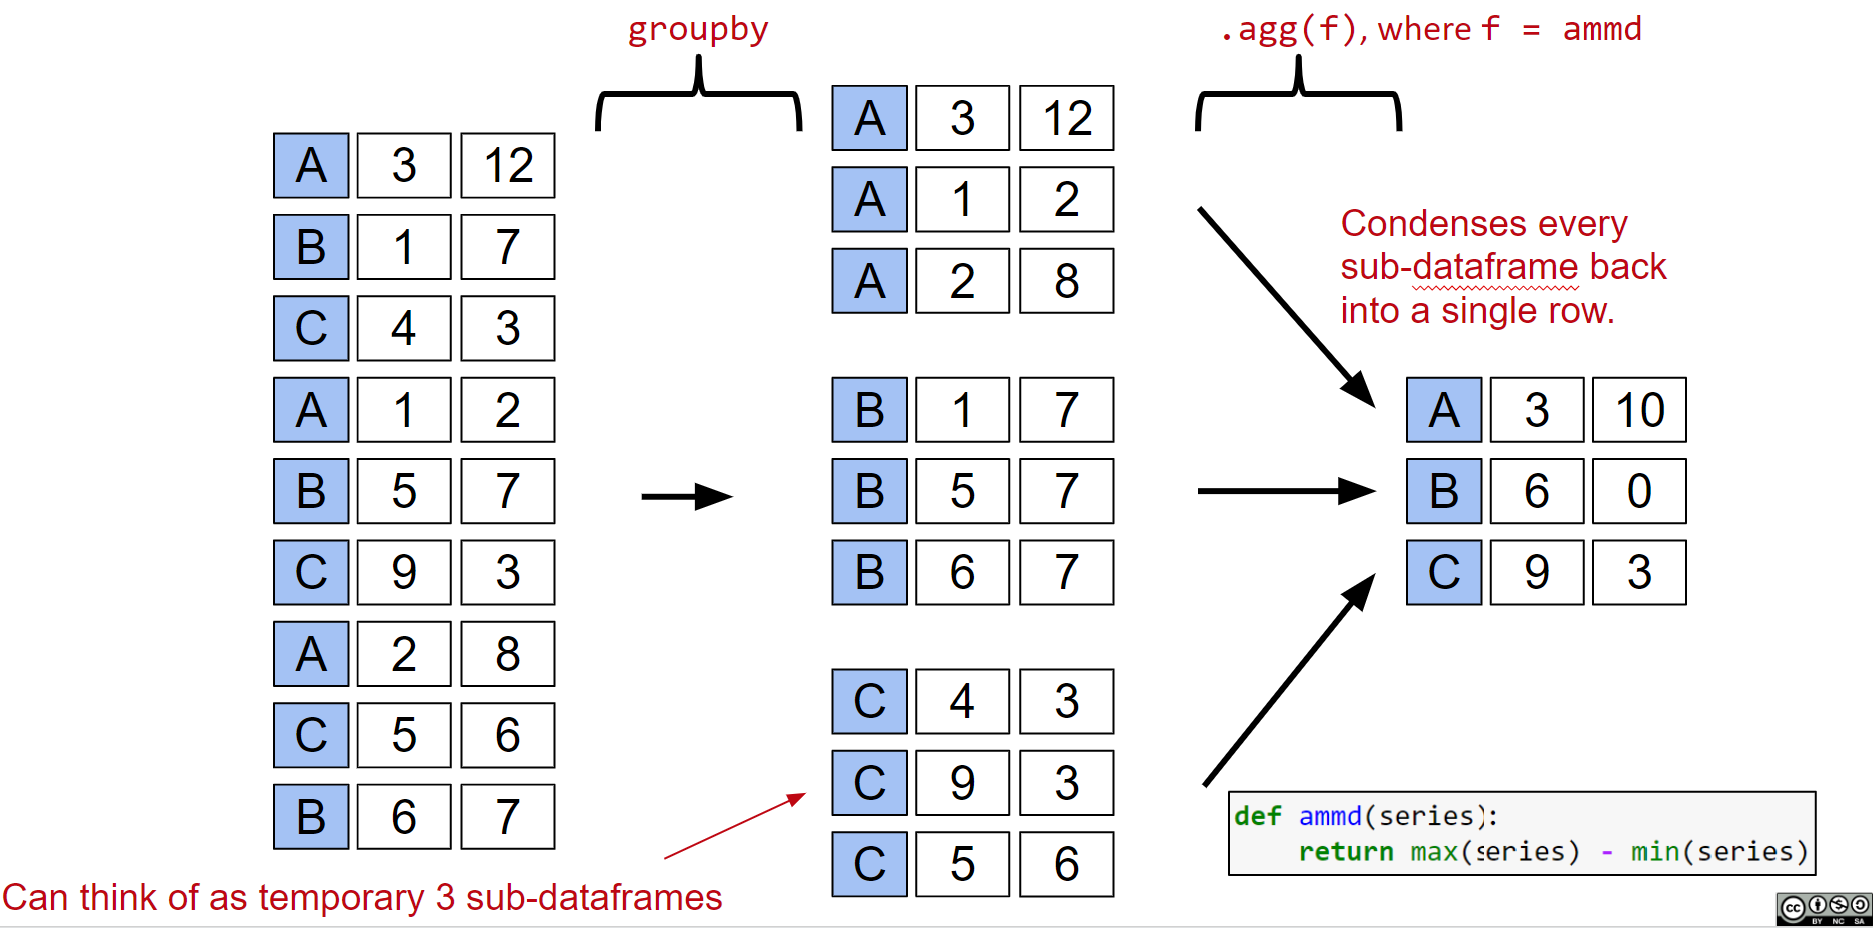

## Some Additional Groupby Puzzles

Groupby puzzle #1: To test your understanding, try to interpret the result of the code below.

<AxesSubplot:xlabel='Year'>

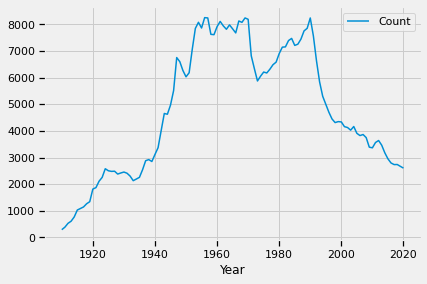

In [31]:
babynames.groupby("Year").agg(ammd).plot()

For reference, the first 5 values from the plot above are:

In [32]:
babynames.groupby("Year").agg(ammd).head(5)

,Count
Year,
1910,290
1911,385
1912,529
1913,609
1914,768


#### groupby Puzzle #2

In [33]:
elections = pd.read_csv("elections.csv")
elections.sample(5)

,Year,Candidate,Party,Popular vote,Result,%
0,1824,Andrew Jackson,Democratic-Republican,151271,loss,57.210122
99,1948,Claude A. Watson,Prohibition,103708,loss,0.212747
173,2016,Donald Trump,Republican,62984828,win,46.407862
53,1896,William McKinley,Republican,7112138,win,51.213817
38,1884,Benjamin Butler,Anti-Monopoly,134294,loss,1.335838


We have to be careful when using aggregation functions. For example, the code below might be misinterpreted to say that Woodrow Wilson ran for election in 2016. Why is this happening?

In [34]:
elections.groupby("Party").agg(max).head(10)

,Year,Candidate,Popular vote,Result,%
Party,,,,,
American,1976,Thomas J. Anderson,873053,loss,21.554001
American Independent,1976,Lester Maddox,9901118,loss,13.571218
Anti-Masonic,1832,William Wirt,100715,loss,7.821583
Anti-Monopoly,1884,Benjamin Butler,134294,loss,1.335838
Citizens,1980,Barry Commoner,233052,loss,0.270182
Communist,1932,William Z. Foster,103307,loss,0.261069
Constitution,2016,Michael Peroutka,203091,loss,0.152398
Constitutional Union,1860,John Bell,590901,loss,12.639283
Democratic,2016,Woodrow Wilson,69498516,win,61.344703


### groupby puzzle #3

Inspired by above, try to predict the results of the groupby operation shown. The answer is below the image.

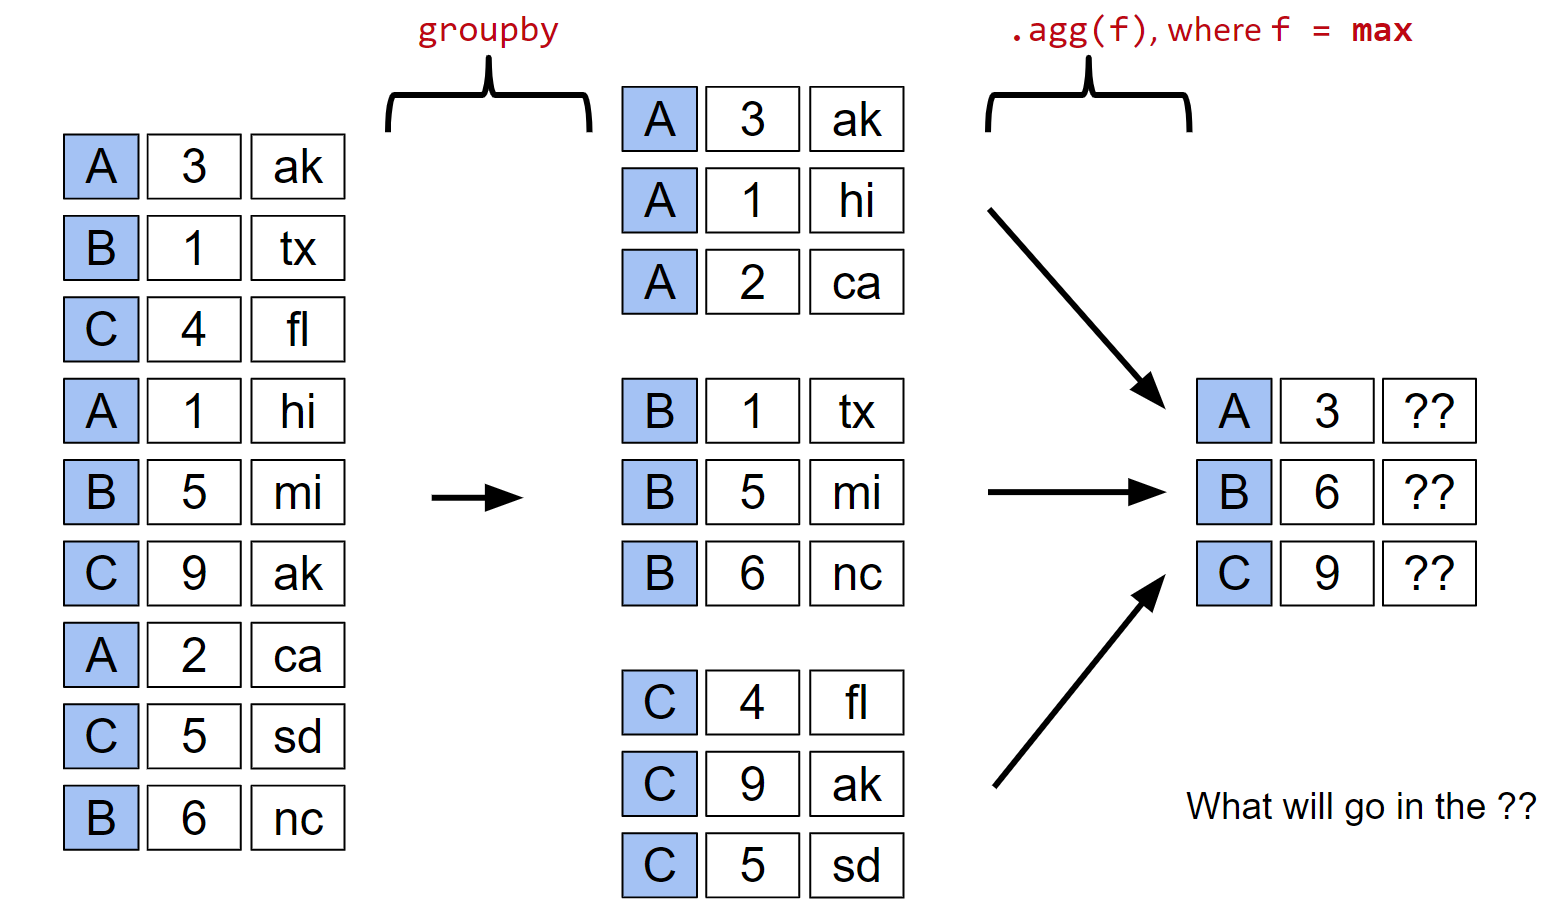

The top ?? will be "hi", the second ?? will be "tx", and the third ?? will be "sd". 

### groupby puzzle #4

Next we'll write code that properly returns the best result by each party. That is, each row should show the Year, Candidate, Popular Vote, Result, and % for the election in which that party saw its best results (rather than mixing them as in the example above).

In [35]:
#def get_first(s):
#    return s.iloc[0]
    
#elections_sorted_by_percent = elections.sort_values("%", ascending=False)
#elections_sorted_by_percent.groupby("Party").agg(lambda x : x.iloc[0])

### groupby puzzle #6: Total Male and Female babies born

Suppose we want to find the total number of male and female babies born each year in California.

Try to figure out how we'd do this using groupby.

## Other groupby Features

It is possible to group a DataFrame by multiple features. For example, if we group by Year and Sex we get back a DataFrame with the total number of babies of each sex born in each year.

In [36]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

The DataFrame resulting from the aggregation operation is now multi-indexed. That is, it has more than one dimension to its index. We will explore this in next week's exercises.

### groupby.size()

In [37]:
#size returns a Series giving the size of each group
elections.groupby("Party").size().head(15)

Party
American                  2
American Independent      3
Anti-Masonic              1
Anti-Monopoly             1
Citizens                  1
Communist                 1
Constitution              3
Constitutional Union      1
Democratic               46
Democratic-Republican     2
Dixiecrat                 1
Farmer–Labor              1
Free Soil                 2
Green                     6
Greenback                 1
dtype: int64

### groupby.filter()

In [38]:
# filter gives a copy of the original DataFrame where row r is included
# if its group obeys the given condition
#
# Note: Filtering is done per GROUP, not per ROW.
elections.groupby("Year").filter(lambda sf: sf["%"].max() < 45)

,Year,Candidate,Party,Popular vote,Result,%
23,1860,Abraham Lincoln,Republican,1855993,win,39.699408
24,1860,John Bell,Constitutional Union,590901,loss,12.639283
25,1860,John C. Breckinridge,Southern Democratic,848019,loss,18.138998
26,1860,Stephen A. Douglas,Northern Democratic,1380202,loss,29.522311
66,1912,Eugene V. Debs,Socialist,901551,loss,6.004354
67,1912,Eugene W. Chafin,Prohibition,208156,loss,1.386325
68,1912,Theodore Roosevelt,Progressive,4122721,loss,27.457433
69,1912,William Taft,Republican,3486242,loss,23.218466
70,1912,Woodrow Wilson,Democratic,6296284,win,41.933422
115,1968,George Wallace,American Independent,9901118,loss,13.571218


### groupby.sum(), groupby.mean(), etc.

As an alternative to groupby.agg(sum), we can also simply do groupby.sum().

In [39]:
elections.groupby("Year").agg(sum).head()

,Popular vote,%
Year,,
1824,264413,100.0
1828,1143703,100.0
1832,1287655,100.0
1836,1460216,100.0
1840,2404437,100.0


In [40]:
elections.groupby("Year").sum().head()

,Popular vote,%
Year,,
1824,264413,100.0
1828,1143703,100.0
1832,1287655,100.0
1836,1460216,100.0
1840,2404437,100.0


The same applies for many other common operations.

In [41]:
elections.groupby("Year").agg(max).head()

,Candidate,Party,Popular vote,Result,%
Year,,,,,
1824,John Quincy Adams,Democratic-Republican,151271,win,57.210122
1828,John Quincy Adams,National Republican,642806,win,56.203927
1832,William Wirt,National Republican,702735,win,54.574789
1836,William Henry Harrison,Whig,763291,win,52.272472
1840,William Henry Harrison,Whig,1275583,win,53.051213


In [42]:
elections.groupby("Year").max().head()

,Candidate,Party,Popular vote,Result,%
Year,,,,,
1824,John Quincy Adams,Democratic-Republican,151271,win,57.210122
1828,John Quincy Adams,National Republican,642806,win,56.203927
1832,William Wirt,National Republican,702735,win,54.574789
1836,William Henry Harrison,Whig,763291,win,52.272472
1840,William Henry Harrison,Whig,1275583,win,53.051213


In [43]:
#elections.groupby("Year").mean().head()
#elections.groupby("Year").median().head()
elections.groupby("Year").max().head()

,Candidate,Party,Popular vote,Result,%
Year,,,,,
1824,John Quincy Adams,Democratic-Republican,151271,win,57.210122
1828,John Quincy Adams,National Republican,642806,win,56.203927
1832,William Wirt,National Republican,702735,win,54.574789
1836,William Henry Harrison,Whig,763291,win,52.272472
1840,William Henry Harrison,Whig,1275583,win,53.051213


## Pivot Tables

### Goal 5: Finding the number of babies born in each year of each sex.

Suppose we want to build a table showing the total number of babies born of each sex in each year. One way is to groupby using both columns of interest.

In [44]:
babynames.groupby(["Year", "Sex"]).agg(sum).head(6)

Count
Year Sex       
1910 F     5950
     M     3213
1911 F     6602
     M     3381
1912 F     9804
     M     8142

A more natural approach is to use a pivot table (like we saw in data 8).

In [45]:
babynames_pivot = babynames.pivot_table(
    index='Year', # the rows (turned into index)
    columns='Sex', # the column values
    values='Count', # the field(s) to processed in each group
    aggfunc=np.max, # group operation
)
babynames_pivot.head(6)

Sex,F,M
Year,,
1910,295,237
1911,390,214
1912,534,501
1913,584,614
1914,773,769
1915,998,1033


The basic idea behind pivot tables is shown in the image below.

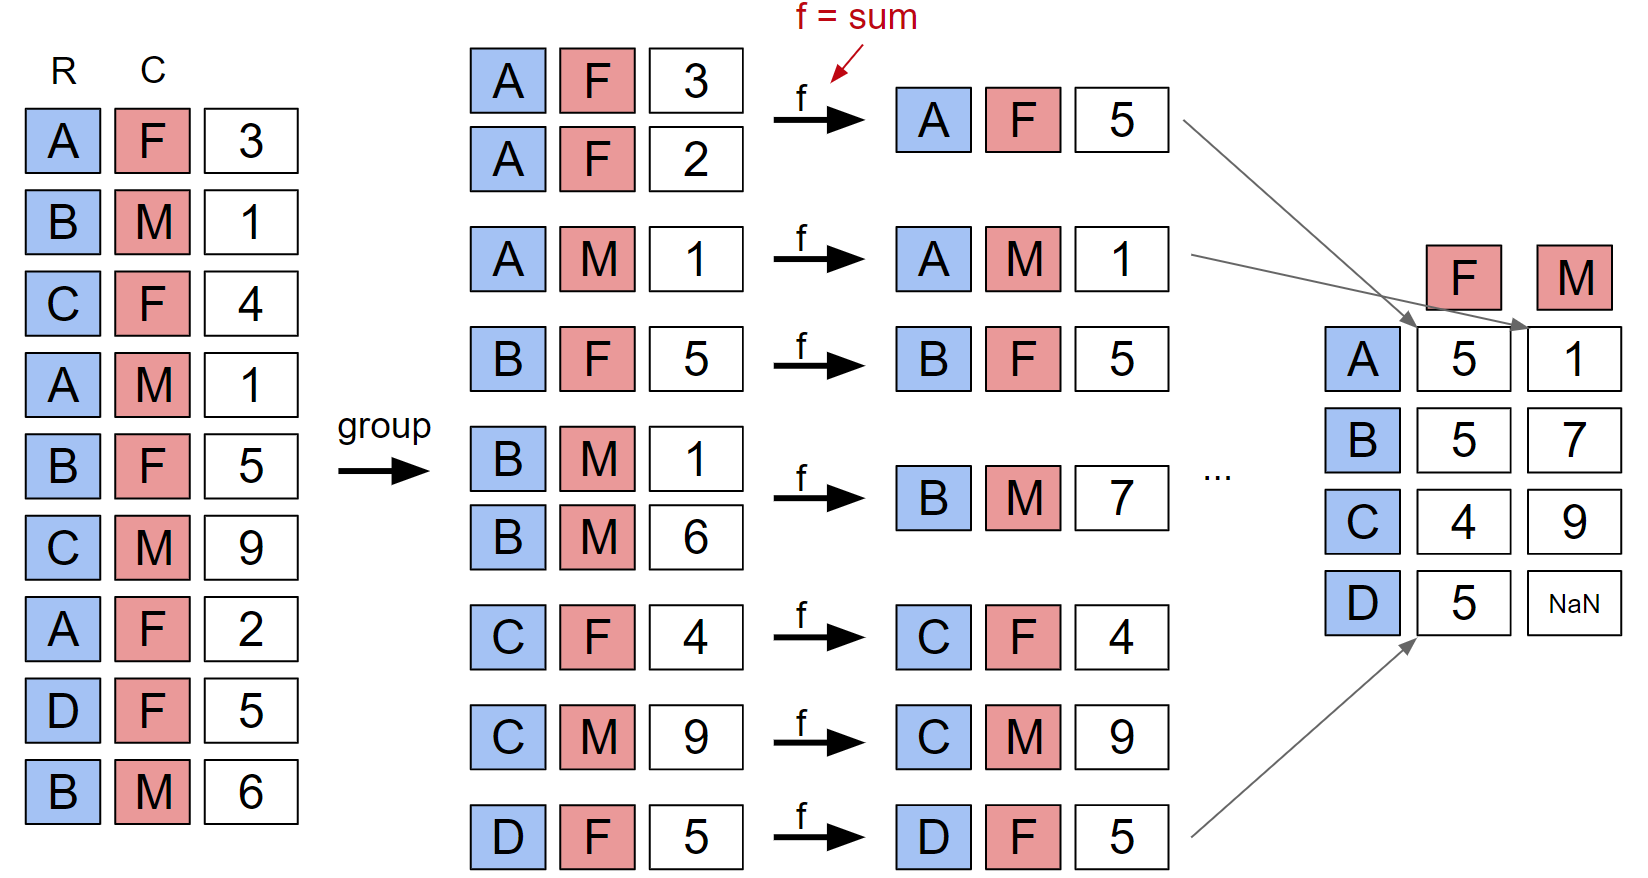

### Extra Groupby Puzzle

### groupby puzzle #5:  More careful look at the most popular 2018 name in California.

In goal 1, we didn't take into account the unlikely possibility that the most popular name was actually spread across both birth sexes. For example, what if in the table below it turns out that there were 300 female Noahs born in CA in 2018. In that case, Noah would actually be the most popular.

Since our queries are getting pretty long, I've stuck them inside parentheses which allows us to spread them over many lines.

In [46]:
(
babynames[babynames["Year"] == 2018]
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221160,CA,F,2018,Emma,2743
385701,CA,M,2018,Noah,2569
221161,CA,F,2018,Mia,2499
221162,CA,F,2018,Olivia,2465
385702,CA,M,2018,Liam,2413


Try to add a single line to the operation above so that each row represents the sum of male and female babies born in 2018 with that name. To do this, fill in the ??? below.

In [47]:
(
babynames[babynames["Year"] == 2018]
    #.???
    .sort_values(by = "Count", ascending = False)
    .head(5)
)

,State,Sex,Year,Name,Count
221160,CA,F,2018,Emma,2743
385701,CA,M,2018,Noah,2569
221161,CA,F,2018,Mia,2499
221162,CA,F,2018,Olivia,2465
385702,CA,M,2018,Liam,2413
